## Clustering with IRIS with K-Means





<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_001.png" width="900">


In [ ]:
!pip install yellowbrick -q

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

# Yellowbrick &mdash; Clustering Evaluation Examples

The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process. It extends the scikit-learn API with a new core object: the `Visualizer`. Visualizers allow models to be fit and transformed as part of the scikit-learn pipeline process, providing visual diagnostics throughout the transformation of high-dimensional data.

In machine learning, clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. There are two primary classes of clustering algorithms: *agglomerative* clustering which links similar data points together, and *centroidal* clustering which attempts to find centers or partitions in the data.

Currently, Yellowbrick provides two visualizers to evaluate *centroidal* mechanisms, particularly K-Means clustering, that help users discover an optimal $K$ parameter in the clustering metric:
- `KElbowVisualizer`  visualizes the clusters according to a scoring function, looking for an "elbow" in the curve.
- `SilhouetteVisualizer`  visualizes the silhouette scores of each cluster in a single model.

In [2]:
iris = datasets.load_iris()
X = iris.data
# clustering is unsupervised learning hence we load only Features X and not the target y

### Let's have a look at the dataset

Before we dive into how this data can be evaluated efficiently using Yellowbrick, let's have a look at how the clusters actually look.

In [3]:
# Converting the data into dataframe
feature_names = iris.feature_names
iris_dataframe = pd.DataFrame(X, columns=feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# import plotly.express as px
# iris = px.data.iris()
# fig = px.scatter_3d(iris, x ='sepal_length', y='petal_length', z='petal_width',color='species')
# fig.show()

In [4]:
fig = px.scatter_3d(X, x =X[:,3], y=X[:,0], z=X[:,2])
fig.show()

### K-Means Algorithm
K-Means is a simple unsupervised machine learning algorithm that groups data into the number $K$ of clusters specified by the user, even if it is not the optimal number of clusters for the dataset.

In [5]:
# Fitting the model with a dummy model, with 3 clusters (we already know there are 3 classes in the Iris dataset)
k = 3
k_means = KMeans(n_clusters=k, random_state=667)
k_means.fit(X)

# # Setting the colors to match cluster results
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' for label in k_means.labels_]

# ax.scatter(X[:,3], X[:,0], X[:,2], c=colors)
fig = px.scatter_3d(X, x =X[:,3], y=X[:,0], z=X[:,2],color=colors)
fig.show()

## Elbow Method

Yellowbrick's `KElbowVisualizer` implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for $K$. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the `KElbowVisualizer` fits the model for a range of $K$ values from 2 to 10, which is set by the parameter `k=(2,11)`. When the model is fit with 3 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since our dataset has 3 clusters of points.

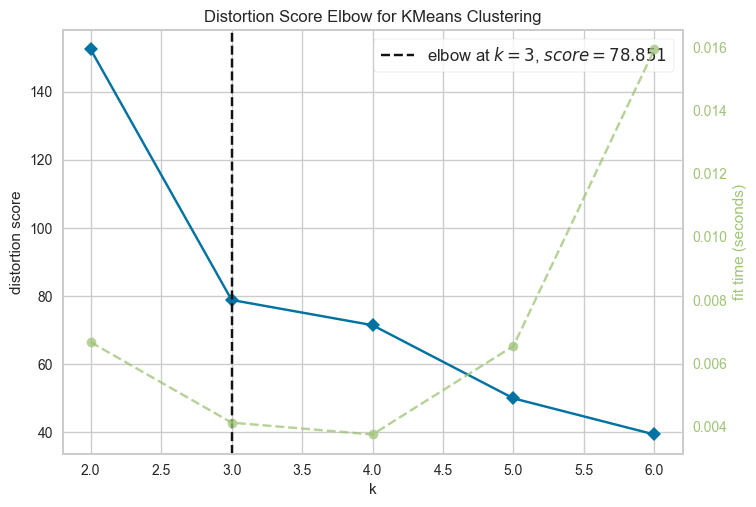

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

By default, the scoring parameter `metric` is set to `distortion`, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the `KElbowVisualizer`&mdash;`silhouette` and `calinski_harabaz`. The `silhouette` score is the mean silhouette coefficient for all samples, while the `calinski_harabaz` score computes the ratio of dispersion between and within clusters.

The `KElbowVisualizer` also displays the amount of time to fit the model per $K$, which can be hidden by setting `timings=False`. In the following example, we'll use the `calinski_harabaz` score and hide the time to fit the model.

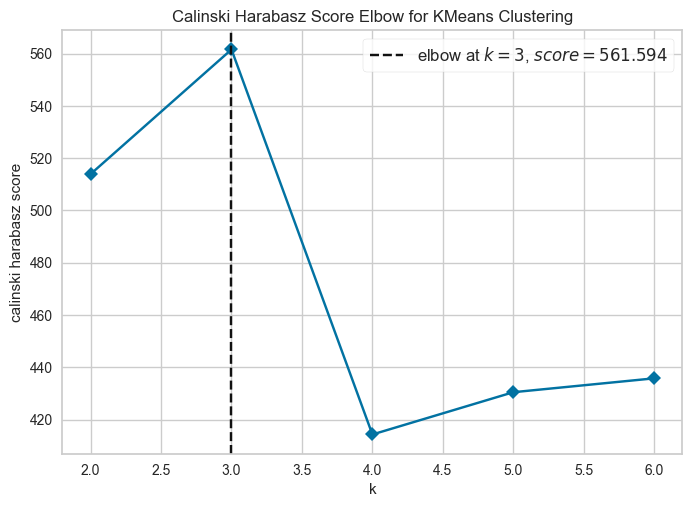

In [9]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7), metric='calinski_harabasz', timings=False)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show();

It is important to remember that the Elbow method does not work well if the data is not very clustered. In such cases, you might see a smooth curve and the optimal value of $K$ will be unclear.

You can learn more about the Elbow method at Robert Grove's [Blocks](https://bl.ocks.org/rpgove/0060ff3b656618e9136b).

## Coordinate Centroidi

Si ricorda che il primo passo dell’algoritmo è quello di inizializzare i centroidi, o i punti centrali dei vari cluster. Con Sklearn ciò è molto semplice dopo la creazione del modello.

Basta richiamare la funzione cluster_centers_ della classe kmeans.

In [10]:
km = KMeans(n_clusters=3)
km.fit(X)
centers = km.cluster_centers_
centers

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

## Prediction vs Real
Il risultato sarà il seguente (0 indica la classe “Setosa”, 1 indica la classe “Versicolor” e 2 indica la classe “Virginica”):

In [11]:
from scipy.stats import mode
y_pred = np.zeros_like(km.labels_)
for i in range(3):
    mask = (km.labels_ == i)
    y_pred[mask] = mode(iris.target[mask])[0]
# Assign the "setosa" class label to 0
y_pred[y_pred == mode(iris.target)[0]] = 0
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

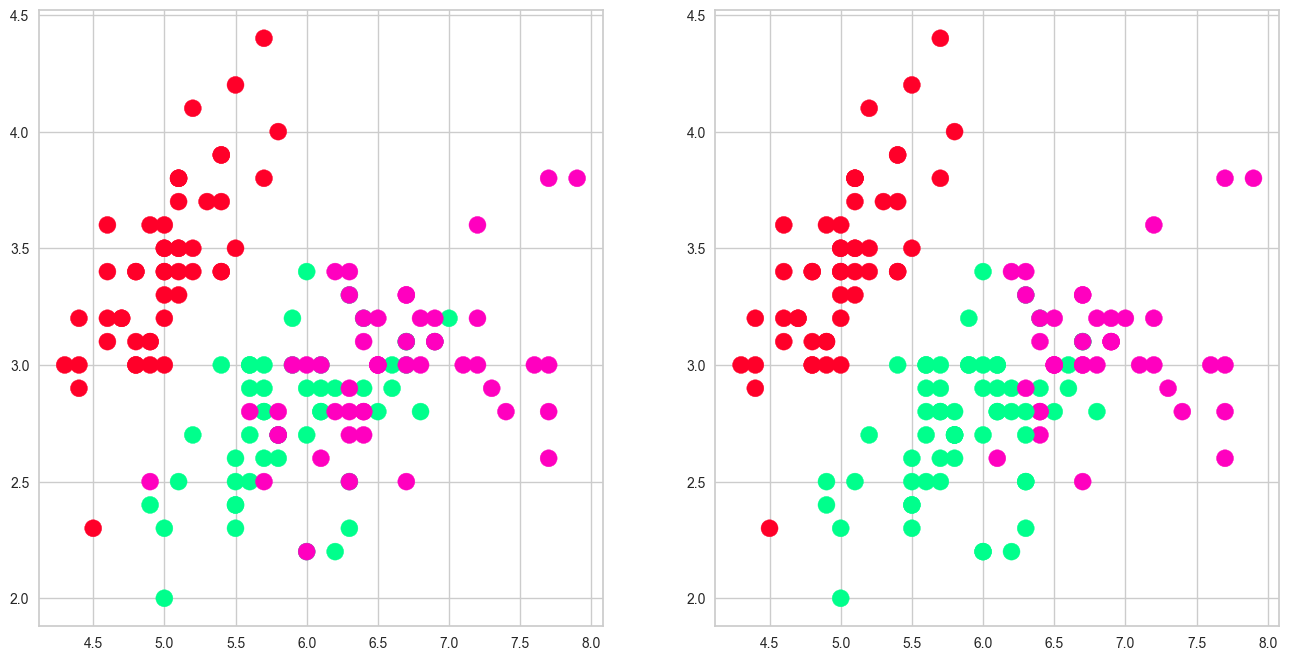

In [13]:
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,0],X[:,1],c=y, cmap='gist_rainbow', s=150);
axes[1].scatter(X[:,0],X[:,1],c=y_pred, cmap='gist_rainbow', s=150);

In [14]:
confronto = pd.DataFrame(list(zip(y,y_pred)), columns=['Reali','Predetti'])
confronto

,Reali,Predetti
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,1
147,2,2
148,2,2


In [ ]:
# length = y_pred.shape[0] # 30
# x = np.linspace(0,length,length)


# plt.figure(figsize=(20,15))
# plt.plot(x, y, label='test')
# plt.plot(x, y_pred, label='predetto')
# plt.legend(loc=2);

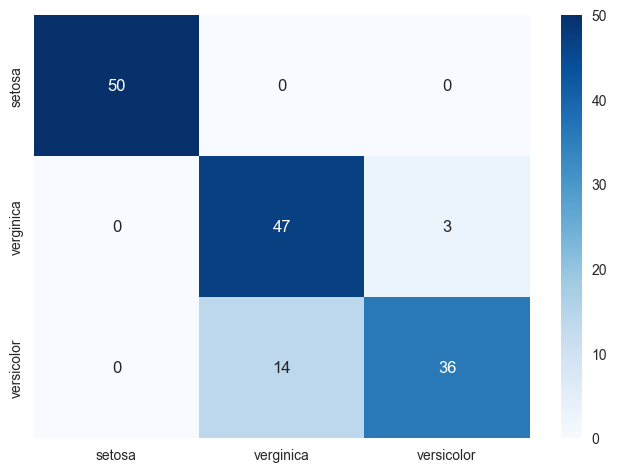

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='Blues');

## Silhouette Visualizer
Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

The `SilhouetteVisualizer` displays the silhouette coefficient for each sample on a per-cluster basis, allowing users to visualize the density and separation of the clusters. This is particularly useful for determining cluster imbalance or for selecting a value for $K$ by comparing multiple visualizers.

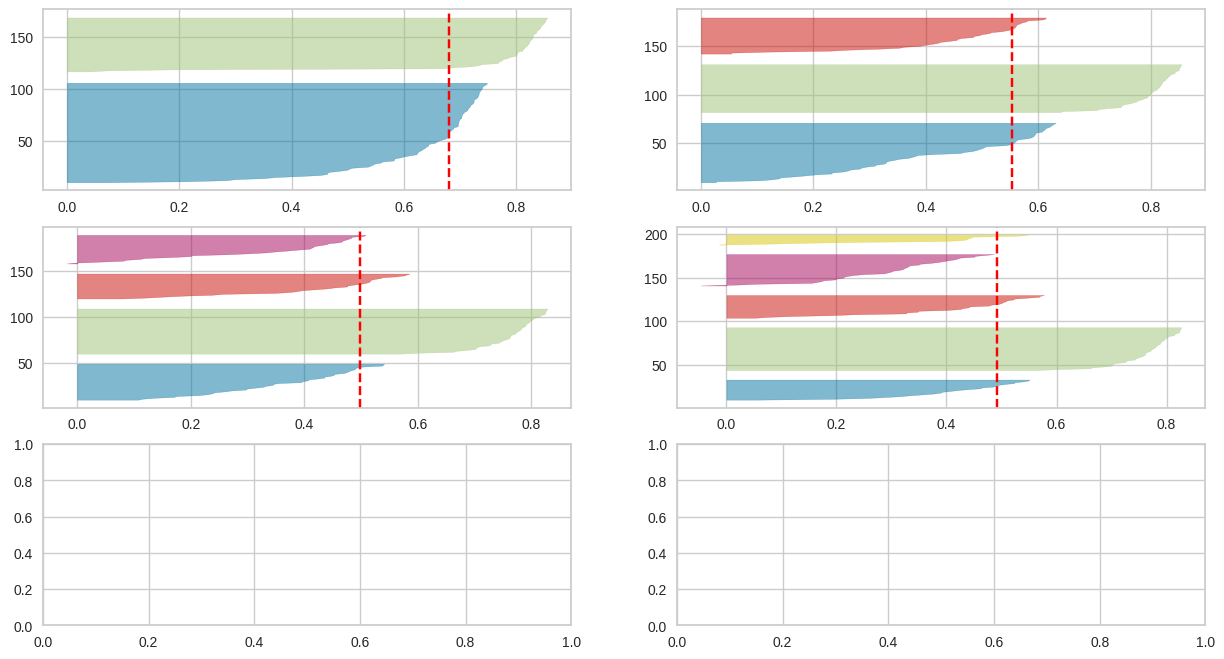

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

X = iris.data
y = iris.target

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

The Silhouette score is maximum(0.68) for K = 2 but that’s not sufficient to select the optimal K.

The following conditions should be checked to pick the right ‘K’ using the Silhouette plots:

For a particular K, all the clusters should have a Silhouette score more than the average score of the dataset (represented by a red dotted line). The x-axis represents the Silhouette score. The clusters with K = 4 and 5 get eliminated as they don’t follow this condition.
There should not be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points. For K = 2, the blue cluster has almost twice the width as compared to the green cluster. This blue cluster gets broken down into 2 sub-clusters for K = 3 and thus forms clusters of uniform size.
So, the Silhouette plot approach gives us K = 3 as the optimal value.

We should select K = 3 for the final clustering on the Iris dataset.

## Dendogram

The dendrogram illustrates how each cluster is composed by drawing the link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged.
- The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.

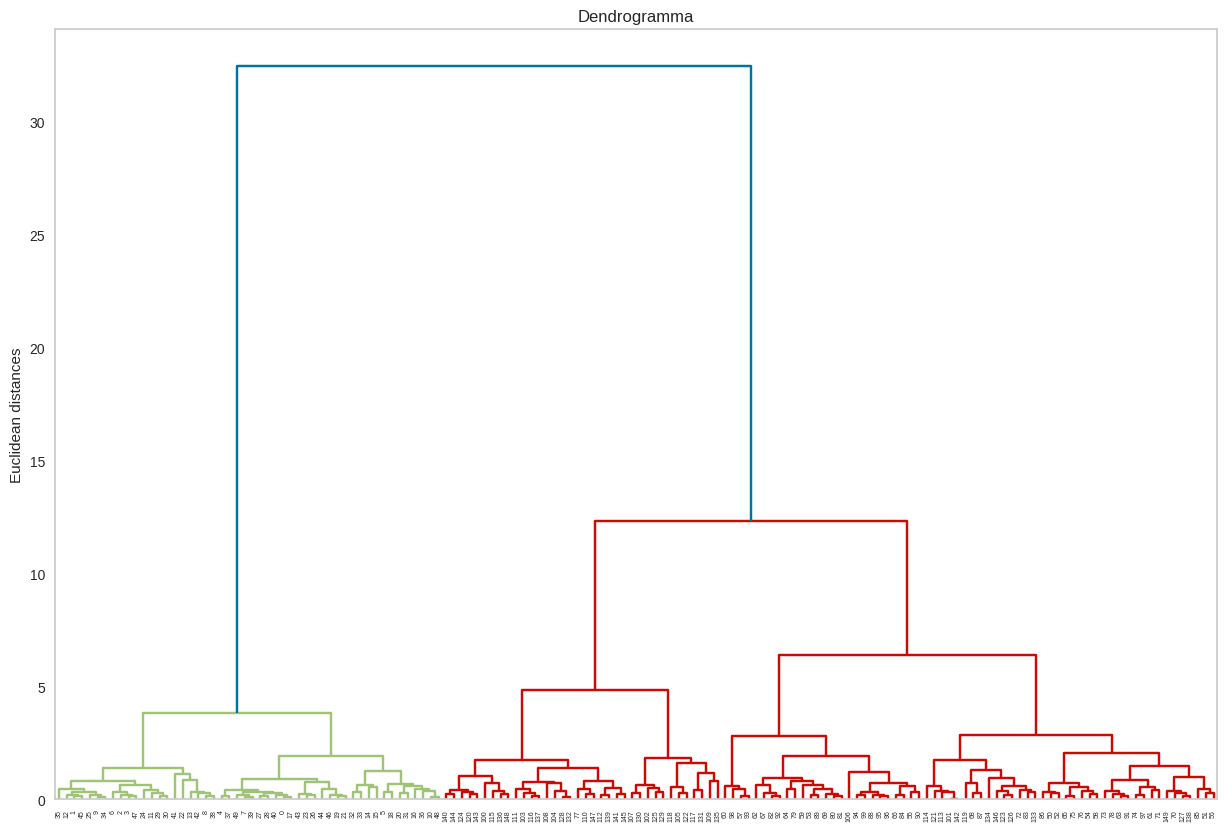

In [17]:
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()